In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [6]:
# simulation parameters
tau = 1e-2
delta_r = 1e-1
c = 3e2
delta_t = 1/c
q = 7 # number of directions to be considered

rho = 1 
mass = 1

-0.05
0.0866025403784
1.9
0.866025403784
-0.05
0.0866025403784
1.9
0.692820323028
-0.05
0.0866025403784
1.9
0.519615242271
-0.05
0.0866025403784
1.9
0.346410161514
-0.05
0.0866025403784
1.9
0.173205080757
-0.05
0.0866025403784
1.9
0.0
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
1.8
0.0
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
1.7
0.0
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
-0.05
0.0866025403784
1.6
0.0
-0.05
0.0866025

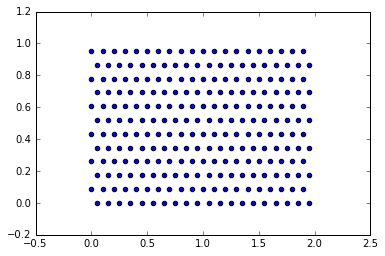

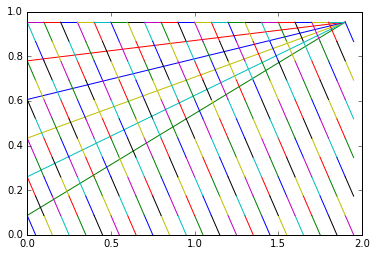

In [57]:
# generate grid (in this case triangular grid on rectangular domain)
L_x = 2
L_y = 1

template_x = np.arange(0, L_x, delta_r)
template_y = np.arange(0, L_y, 1/2*np.sqrt(3)*delta_r)

x_points = np.size(template_x)
y_points = np.size(template_y)

template_xi = np.arange(x_points, dtype=np.int)
template_yi = np.arange(y_points, dtype=np.int)

[grid_x, grid_y] = np.meshgrid(template_x, template_y, indexing='ij')
[grid_xi, grid_yi] = np.meshgrid(template_xi, template_yi, indexing='ij')
grid_x[:,::2] += (1/2)*delta_r

plt.scatter(np.ravel(grid_x), np.ravel(grid_y))

link_list = np.ones(np.concatenate((grid_x.shape, [7, 2])), dtype=np.int) * -1

# stationary direction
link_list[:,:,0,0] = grid_xi
link_list[:,:,0,1] = grid_yi

# +x direction
link_list[:,:,1,0] = grid_xi[:,:]+1
link_list[:,:,1,1] = grid_yi[:,:]

# up-left direction
link_list[:,::2,2,0] = grid_xi[:,::2]
link_list[:,1::2,2,0] = grid_xi[:,1::2]-1
link_list[:,:,2,1] = grid_yi[:,:]+1

# clean up out-of-bounds links
inv_link_x = (link_list[:,:,:,0] >= x_points) | (link_list[:,:,:,0] < 0)
inv_link_y = (link_list[:,:,:,1] >= y_points) | (link_list[:,:,:,1] < 0)

inv_link = inv_link_x | inv_link_y

link_list[inv_link,:] = -1

plt.figure();
direc = 2
for i in range(x_points):
    for j in range(y_points):
        x1 = grid_x[i,j]
        y1 = grid_y[i,j]
        
        #print(link_list[i,j,direc,0])
        #print(link_list[i,j,direc,1])
        
        x2 = grid_x[link_list[i,j,direc,0], link_list[i,j,direc,1]]
        y2 = grid_y[link_list[i,j,direc,0], link_list[i,j,direc,1]]
        
        print(x2-x1)
        print(y2-y1)
        
        plt.plot(np.array([x1, x2]), np.array([y1, y2]))

In [37]:
grid_xi

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19],
       [ 0,  1,  2,  3,  4,  5

In [38]:
grid_yi

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2],
       [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3],
       [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5],
       [ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6],
       [ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7],
       [ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8,  8],
       [ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9],
       [10, 10, 10, 10, 10, 10